In [22]:
from sklearn.datasets import make_classification
import numpy as np

In [23]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, 
                          n_classes = 2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [24]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


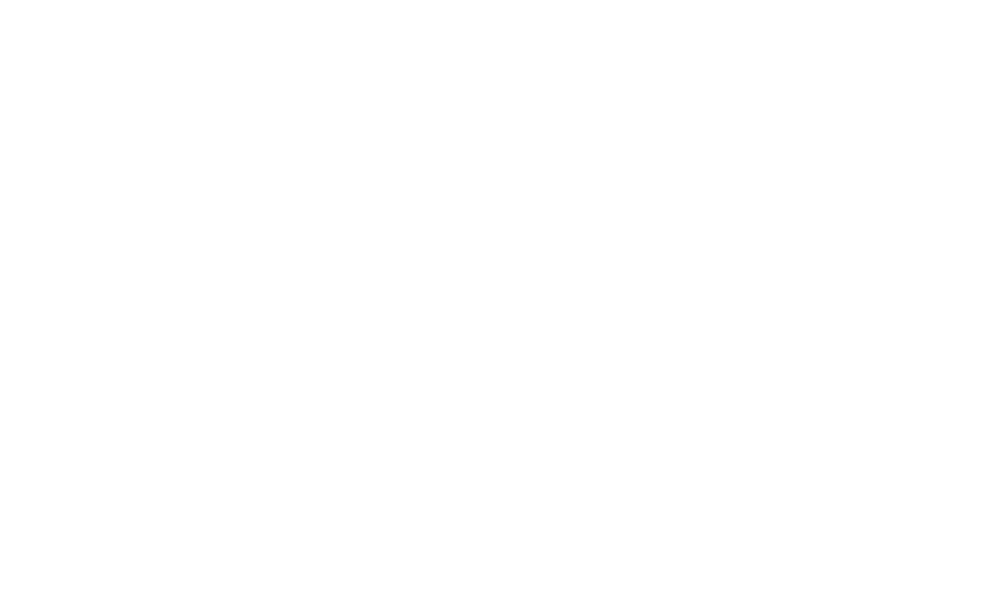

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s=100)

In [26]:
def perceptron(x, y):
    x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j], weights))
        weights = weights + (lr * (y[j] - y_hat) * x[j])
        
    return weights[0], weights[1:]

In [27]:
def step(z):
    return 1 if z>0 else 0 

In [28]:
intercept_,coef_ = perceptron(x,y)

In [29]:
print(intercept_)
print(coef_)

1.2000000000000002
[1.0580085  0.40381514]


In [30]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [31]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


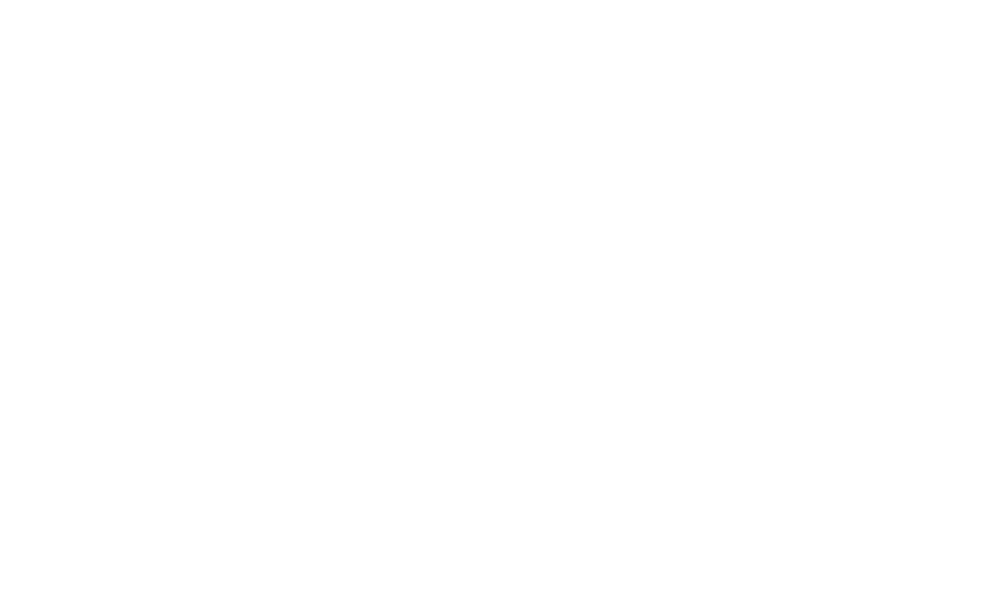

(-3.0, 2.0)

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using Step Function

In [48]:
def perceptron(x, y):
    m = []
    b = []
    
    x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + (lr * (y[j] - y_hat) * x[j])
    
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b
    

In [49]:
m, b = perceptron(x, y)

In [50]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


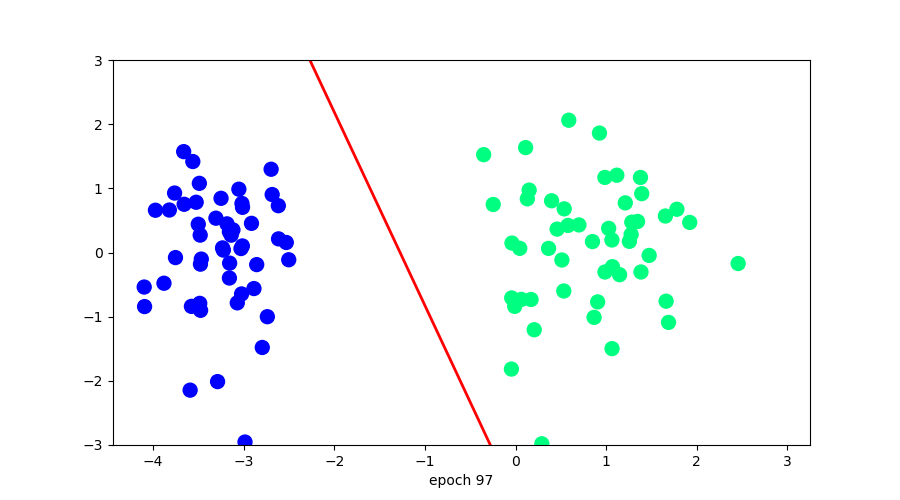

In [51]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lor = LogisticRegression()

In [39]:
lor.fit(x, y)

LogisticRegression()

In [40]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [41]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


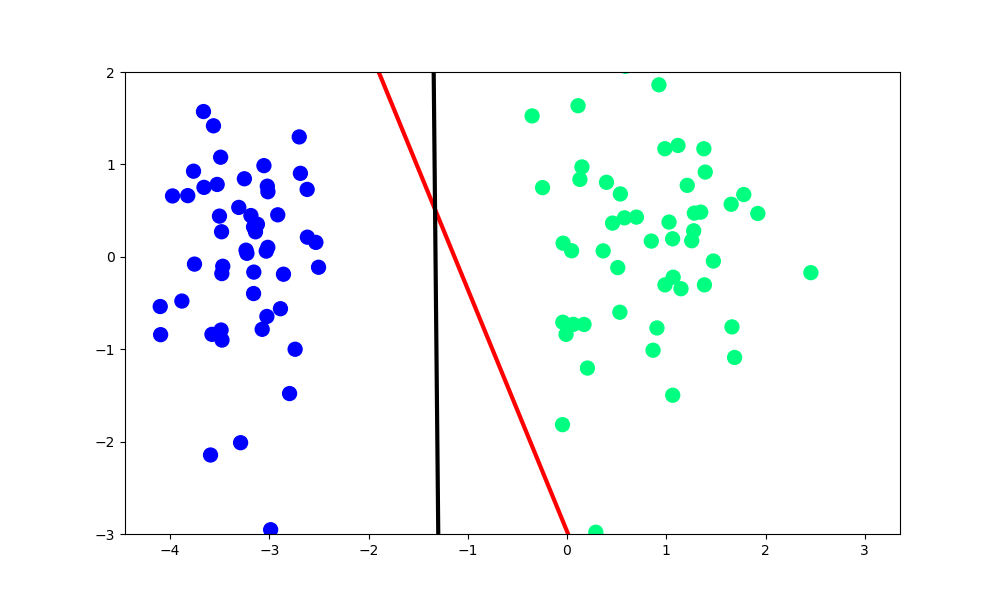

(-3.0, 2.0)

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using Sigmoid Function

In [52]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [60]:
def perceptron(x, y):
    x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(x[j], weights))
        
        weights = weights + (lr * (y[j] - y_hat) * x[j])
        
    return weights[0], weights[1:]

In [61]:
intercept_,coef_ = perceptron(x,y)

In [62]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [63]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

<IPython.core.display.Javascript object>


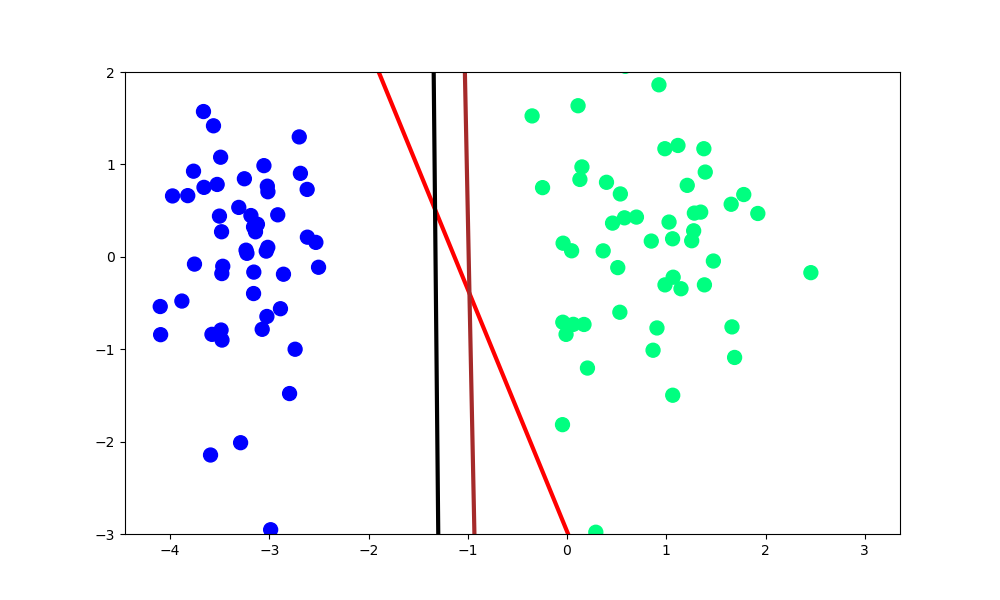

(-3.0, 2.0)

In [64]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)